In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import FD as FD_file
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file

In [4]:
L = 1
N = 128
dx = L/N
xyz = np.arange(-L/2, L/2, dx)
x, y, z = np.meshgrid(xyz, xyz, xyz, indexing='ij')

phi = np.sign(y) * np.arccos(x / np.sqrt(x*x + y*y))
phi[np.logical_and(np.sign(y) == 0.0, np.sign(x)<0)] = np.pi
phi[np.where(x*x + y*y == 0)] = 0
r = np.sqrt(x*x + y*y + z*z)
theta = np.arccos(z / r)
theta[np.where(r == 0)] = 0

gtt = -1 + 2/r
n = r*r*(-2+r)
gxx = -1 - (2*x*x)/n
gxy = - (2*x*y)/n
gxz = - (2*x*z)/n
gyy = -1 - (2*y*y)/n
gyz = - (2*y*z)/n
gzz = -1 - (2*y*y)/n
gdown = np.array([[gxx, gxy, gxz],
                  [gxy, gyy, gyz],
                  [gxz, gyz, gzz]])

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykerne

In [5]:
FD = FD_file.FD_Class(dx, dx, dx, periodic_boundary=False)
RCW = RCW_file.Ricci_CoGrad_Weyl_Class(FD)
gup = RRead.inv3(gdown)
Gudd = RCW.Christoffel_symbol(gdown, gup)

xynorm = (np.cos(phi)**2 * gxx + 2 * np.cos(phi) * np.sin(phi) * gxy + np.sin(phi)**2 * gyy)
xyznorm = (np.sin(theta)**2 * xynorm + 2 * np.cos(theta) * np.sin(theta) * (np.cos(phi) * gxz + np.sin(phi) * gyz)+ np.cos(theta)**2 * gzz)
Sx = np.cos(phi) * np.sin(theta) / np.sqrt(xyznorm)
Sy = np.sin(phi) * np.sin(theta) / np.sqrt(xyznorm)
Sz = np.cos(theta) / np.sqrt(xyznorm)
sup = np.array([Sx, Sy, Sz])

Theta = np.einsum('aa... -> ...', RCW.CovD3_tensor1up(Gudd, sup))

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


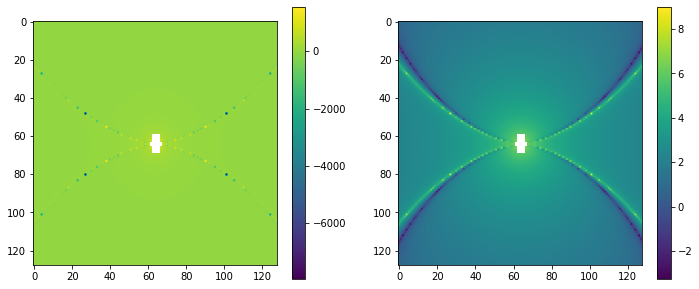

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(Theta[:,:,int(N/2)])
plt.colorbar()

plt.subplot(122)
plt.imshow(np.log(abs(Theta[:,:,int(N/2)])))
plt.colorbar()